<a href="https://colab.research.google.com/github/ReinerJasin/ai-app-sys/blob/main/Week10_12224827.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Week 10 lab session, we are going to make a sample prediction of an image an show an output of the prediction. The output is gonna be shown as probablity.

First import the libraries we're gonna need.

In [1]:
import torch
import torchvision
from torchvision import transforms
from PIL import Image

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Before doing the next step, download any image of a dog you can find on the internet and upload it to google colab directory by pressing the following icon on your files

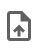

After choosing your file, the result will be like this

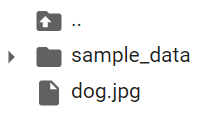

Next we can open the image and modify it so it can fit the required parameter of the model

In [2]:
# Load and preprocess image
image = Image.open('/content/dog.jpg')
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
]) # Parameters are documented at pytorch.org.

input_tensor = preprocess(image)

# Convert to 4-dimensional tensor.
inputs = input_tensor.unsqueeze(0)

Now we are going to load the resnet50 model and make the prediction. The Resnet50 model is finished when we load it so we don't have to train it further.

In [3]:
# Load the pre-trained model.
model = torchvision.models.resnet50(weights = torchvision.models.ResNet50_Weights.IMAGENET1K_V1)
model.eval()

# Transfer model to GPU
model.to(device)

# Do prediction
inputs = inputs.to(device)
with torch.no_grad():
  outputs = model(inputs)

# Convert to probabilities, since final SoftMax activation is not in pretrained model.
probabilities = torch.nn.functional.softmax(outputs[0], dim = 0)

# Print class ID for top 5 predictions.
_, indices = torch.sort(probabilities, descending = True)
  
for i in range(0,5):
  print ('ImageNet class:', indices[i].item(), '. probability = %4.3f' % probabilities[indices[i]].item())

# Show image
image.show()

ImageNet class: 154 . probability = 0.321
ImageNet class: 207 . probability = 0.266
ImageNet class: 265 . probability = 0.046
ImageNet class: 194 . probability = 0.039
ImageNet class: 200 . probability = 0.036


From the result above, we can see that the dog image uploaded earlier most likely belong to the class '154' with the probability of 0.321 (32.1%)

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [5]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [6]:
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.05449587,  0.2842059 , -0.22581589, -0.11952884, -0.04213381,
          0.29839098,  0.10094464, -0.23426422, -0.07427353,  0.16819349,
          0.16839662, -0.11957245,  0.14934793, -0.29390046, -0.29038095,
         -0.2390116 ,  0.08398399, -0.06243207, -0.03192163,  0.16304007,
         -0.2642227 ,  0.10946664,  0.02224755,  0.24604875, -0.1864247 ,
          0.270774  , -0.12686464,  0.13545486,  0.08784539,  0.1962755 ,
         -0.02554744,  0.02937558, -0.1763319 , -0.03463483,  0.01731351,
          0.17363724,  0.28992832,  0.1006287 , -0.18136288,  0.01554874,
          0.01760256, -0.15955126,  0.22340465, -0.15567845, -0.20103273,
          0.07133764,  0.29163545,  0.20161515,  0.05924127, -0.15105492,
         -0.2726022 , -0.2724807 ,  0.13157815, -0.19324736,  0.12840083,
          0.13600582,  0.29912066, -0.07911959,  0.10586545, -0.18452421,
          0.15869322,  0.23450047,  0.23336

In [7]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [8]:
inputs = keras.Input(shape=(3,), name="my_input")

In [9]:
inputs.shape

TensorShape([None, 3])

In [10]:
inputs.dtype

tf.float32

In [11]:
features = layers.Dense(64, activation="relu")(inputs)

In [12]:
features.shape

TensorShape([None, 64])

In [13]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [14]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________
